# New Database Trips and Members

### Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df_newinfo = pd.read_csv("/home/pau/Ironhack/week5/project5/Project-Week-5-Your-Own-Project/your-project/Pronto_Cycle_Share_Trip_Data.csv") 

In [3]:
df_newinfo.count()

trip_id              275091
starttime            275091
stoptime             275091
bikeid               275091
tripduration         275091
from_station_name    275091
to_station_name      275091
from_station_id      275091
to_station_id        275091
usertype             275091
gender               173815
birthyear            173811
dtype: int64

In [4]:
df_newinfo.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33:00 AM,10/13/2014 10:48:00 AM,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34:00 AM,10/13/2014 10:48:00 AM,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [5]:
df_newinfo["starttime"] = df_newinfo["starttime"].astype("datetime64[ns]")
df_newinfo["stoptime"] = df_newinfo["stoptime"].astype("datetime64[ns]")
df_newinfo["Year"] = df_newinfo["starttime"].dt.year
df_newinfo = df_newinfo.drop(["from_station_name","to_station_name","gender","birthyear"], axis=1)
df_newinfo["tripduration"] = ((df_newinfo["tripduration"])/3600)
df_newinfo["Month"] = df_newinfo["starttime"].dt.month
df_newinfo["YearMonthDay"] = df_newinfo["starttime"].dt.date

In [6]:
def replace_numbers(month):
    if month < 10:
        return "0" + str(month)
    return str(month)

df_newinfo["Month"] = df_newinfo["Month"].apply(replace_numbers)

In [7]:
df_newinfo["YearMonth"] = df_newinfo[["Year","Month"]].apply(lambda row: str(row["Year"])+"-"+str(row["Month"]), axis=1)

In [8]:
df_newinfo.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,to_station_id,usertype,Year,Month,YearMonthDay,YearMonth
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,0.273871,CBD-06,PS-04,Member,2014,10,2014-10-13,2014-10
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,0.257326,CBD-06,PS-04,Member,2014,10,2014-10-13,2014-10
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,0.245509,CBD-06,PS-04,Member,2014,10,2014-10-13,2014-10
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,0.240538,CBD-06,PS-04,Member,2014,10,2014-10-13,2014-10
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,0.256645,CBD-06,PS-04,Member,2014,10,2014-10-13,2014-10


#### Merging for a New Database

In [9]:
df_1 = df_newinfo.groupby(["YearMonthDay"]).sum()[["tripduration"]]
df_2 = df_newinfo.groupby(["YearMonthDay"]).count()[["trip_id"]]

In [10]:
df_merged21 = df_2.merge(df_1, left_on="YearMonthDay", right_on="YearMonthDay")
df_merged21 = df_merged21.reset_index()
df_merged21["YearMonthDay"] = df_merged21["YearMonthDay"].astype("datetime64[ns]")

In [11]:
df_merged21.to_csv("/home/pau/Ironhack/week5/project5/Project-Week-5-Your-Own-Project/your-project/yearmonthday_trip_duration.csv")

### Trips Duration Analysis

In [12]:
df_service_per_day = df_newinfo.groupby(["YearMonthDay"]).sum()[["tripduration"]]
df_service_per_day.count()

tripduration    901
dtype: int64

In [13]:
df_service_per_day["sma(120)"] = df_service_per_day["tripduration"].rolling(120).mean()
df_service_per_day["sma(30)"] = df_service_per_day["tripduration"].rolling(30).mean()
df_service_per_day.head()

,tripduration,sma(120),sma(30)
YearMonthDay,,,
2014-10-13,118.642416,NaN,NaN
2014-10-14,153.051864,NaN,NaN
2014-10-15,66.719825,NaN,NaN
2014-10-16,111.195446,NaN,NaN
2014-10-17,74.685121,NaN,NaN


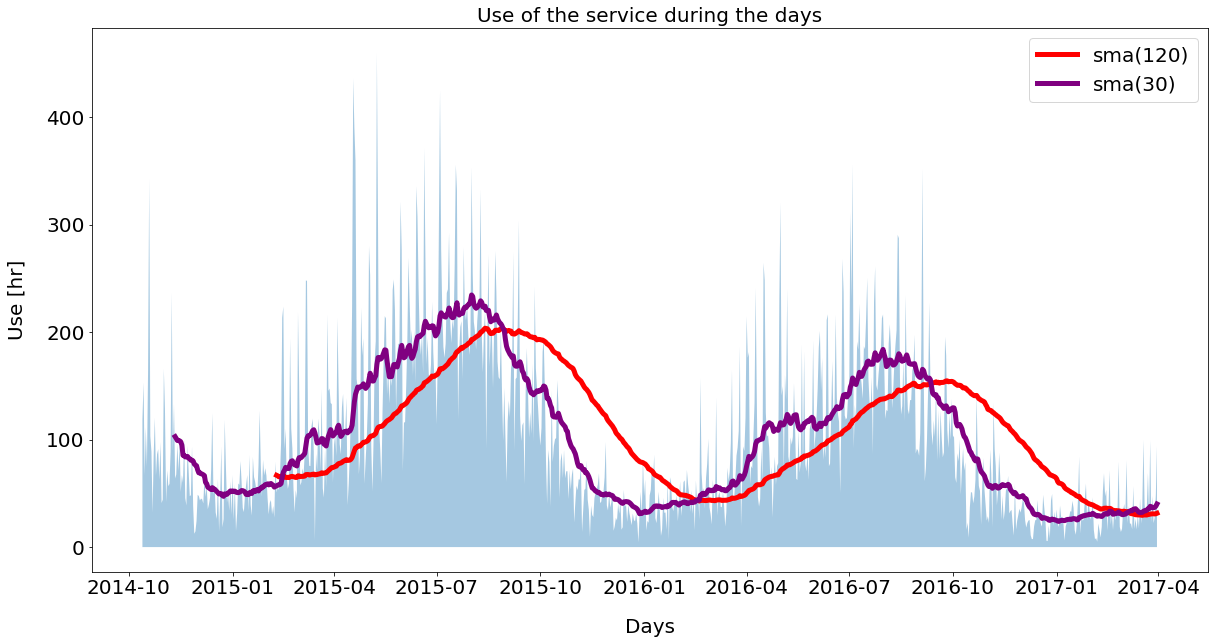

In [34]:
plt.figure(figsize=(20,10))
plt.fill_between(df_service_per_day.index,df_service_per_day["tripduration"], alpha=0.4)
plt.plot(df_service_per_day.index,df_service_per_day["sma(120)"], color="red", linewidth=5)
plt.plot(df_service_per_day.index,df_service_per_day["sma(30)"], color="purple", linewidth=5)
plt.title("Use of the service during the days", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Days", fontsize=20, labelpad=20)
plt.ylabel("Use [hr]", fontsize=20, labelpad=20)
plt.legend(fontsize=20)
plt.show()

### Members Analysis

In [15]:
df_member = df_newinfo[df_newinfo["usertype"] == "Member"].groupby("Year").count()["trip_id"]
df_short_term = df_newinfo[df_newinfo["usertype"] == "Short-Term Pass Holder"].groupby("Year").count()["trip_id"]

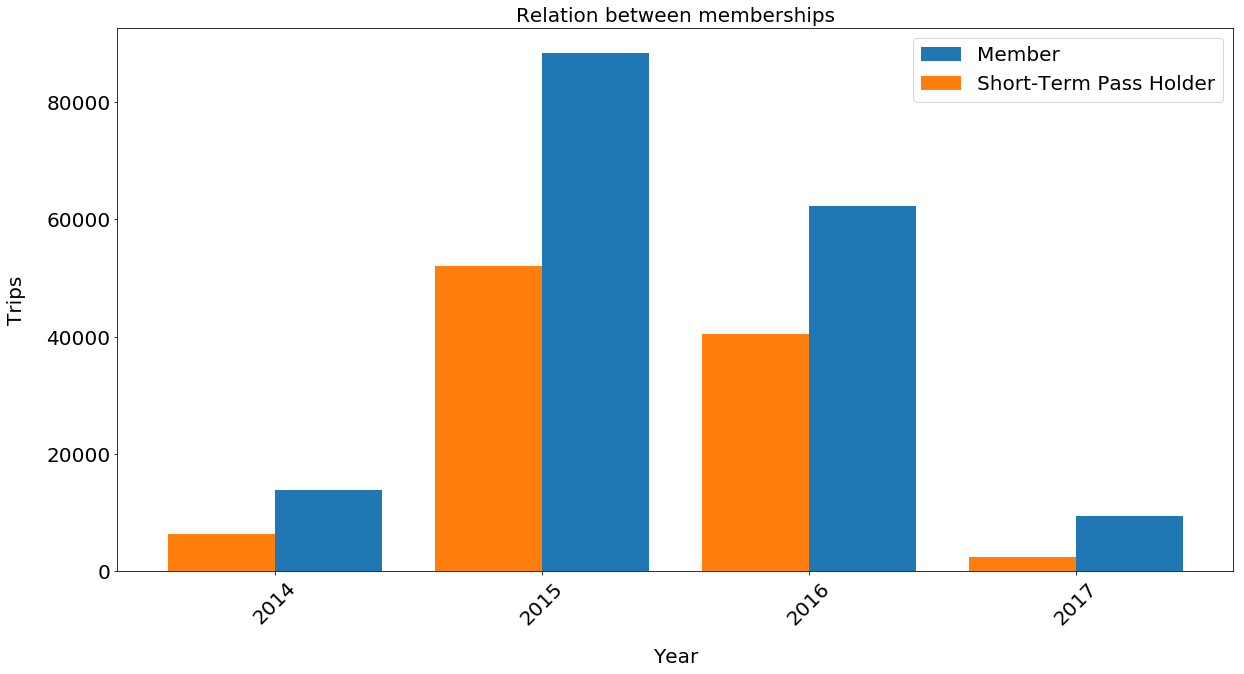

In [33]:
plt.figure(figsize=(20,10))
x_member = [x+0.2 for x in range(df_member.shape[0])]
x_short_term = [x - 0.2 for x in range(df_member.shape[0])]
plt.bar(x_member, df_member, width = 0.4, label="Member")
plt.bar(x_short_term, df_short_term, width = 0.4, label="Short-Term Pass Holder")
plt.xticks([x for x in range(df_member.shape[0])], df_member.index, rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Year", fontsize=20, labelpad=20)
plt.ylabel("Trips", fontsize=20, labelpad=20)
plt.legend(fontsize=20)
plt.title("Relation between memberships", fontsize=20)
plt.show()

In [17]:
percentage_during_these_years = []
for position in range(len(df_short_term)):
    percentage_during_these_years.append(df_short_term.iloc[position]/(df_short_term.iloc[position]+df_member.iloc[position]))
    percentage_during_these_years.append(df_member.iloc[position]/(df_short_term.iloc[position]+df_member.iloc[position]))

In [18]:
percentage_during_these_years

[0.3142447749394733,
 0.6857552250605267,
 0.37095750974759606,
 0.6290424902524039,
 0.39370991949788514,
 0.6062900805021149,
 0.20719364282726893,
 0.7928063571727311]

-------------------------------------------------------------------------------------------------------------------

# New Database Weather

### Data Cleaning

In [19]:
df_newweather = pd.read_csv("/home/pau/Ironhack/week5/project5/Project-Week-5-Your-Own-Project/your-project/seattleWeather_1948-2017.csv")

In [20]:
df_newweather.dtypes

DATE     object
PRCP    float64
TMAX      int64
TMIN      int64
RAIN       bool
dtype: object

In [21]:
#it didn't work don't know why
#df_newweather[df_newweather["DATE"] == "2014-10-13"]
#df_newweather[df_newweather["DATE"] == "2017-03-31"]
#df_newweather = df_newweather.drop(df_newweather.index[0:24392])
#df_newweather = df_newweather.drop(df_newweather.index[25293::])

In [22]:
df_newweather["DATE"] = df_newweather["DATE"].astype("datetime64[ns]")

In [23]:
df_newweather.dtypes

DATE    datetime64[ns]
PRCP           float64
TMAX             int64
TMIN             int64
RAIN              bool
dtype: object

In [24]:
df_n2weather = df_merged21.merge(df_newweather, left_on="YearMonthDay", right_on="DATE")
df_n2weather = df_n2weather.drop(["DATE"], axis=1)
df_n2weather = df_n2weather.rename(columns={"trip_id":"rides"})

In [25]:
df_n2weather.head()

,YearMonthDay,rides,tripduration,PRCP,TMAX,TMIN,RAIN
0,2014-10-13,409,118.642416,0.30,70,50,True
1,2014-10-14,491,153.051864,0.28,62,53,True
2,2014-10-15,313,66.719825,0.34,61,53,True
3,2014-10-16,395,111.195446,0.00,69,52,False
4,2014-10-17,294,74.685121,0.13,62,53,True


In [26]:
df_n2weather["Month"] = df_n2weather["YearMonthDay"].dt.month

In [27]:
def replace_numbers(month):
    if month < 10:
        return "0" + str(month)
    return str(month)

df_n2weather["Month"] = df_n2weather["Month"].apply(replace_numbers)

In [28]:
df_n2weather["Year"] = df_n2weather["YearMonthDay"].dt.year
df_n2weather["YearMonth"] = df_n2weather[["Year","Month"]].apply(lambda row: str(row["Year"])+"-"+str(row["Month"]), axis=1)
df_wololo = df_n2weather.groupby(["YearMonth"]).sum()[["PRCP","rides"]]
df_wololo.head()

,PRCP,rides
YearMonth,,
2014-10,6.45,6585
2014-11,4.84,7823
2014-12,4.79,5831
2015-01,3.66,7366
2015-02,5.27,7330


### Weather Analysis

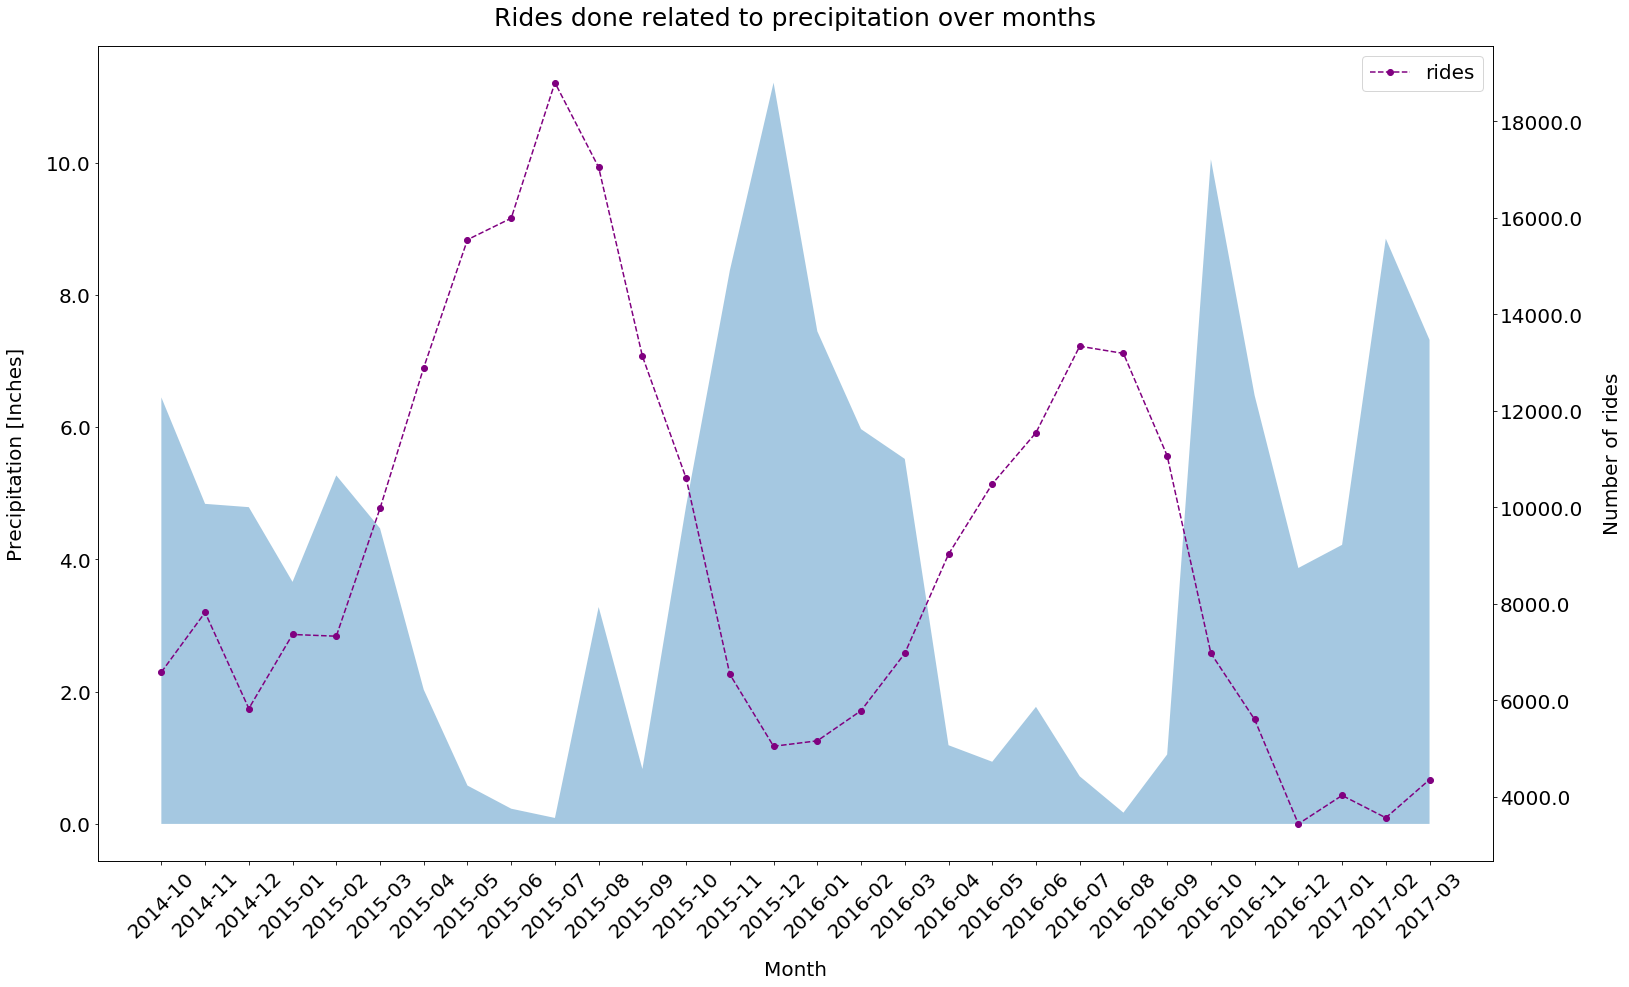

In [29]:
fig, ax1 = plt.subplots(1, figsize=(25, 15))

ax2 = ax1.twinx()

ax1.fill_between(df_wololo.index, df_wololo["PRCP"], alpha=0.4)
ax1.set_title("Rides made related to precipitation over months", fontdict={"fontsize":25}, pad=20)
ax1.set_ylabel("Precipitation [Inches]", fontdict={"fontsize":20}, labelpad=20)
ax2.set_ylabel("Number of rides", fontdict={"fontsize":20},  labelpad=20)
ax1.set_xlabel("Month", fontdict={"fontsize":20}, labelpad=20)
ax2.plot(df_wololo.index,df_wololo["rides"], color="purple", linestyle="--", marker="o", alpha=1, label="rides")
ax1.set_xticklabels(df_wololo.index, fontsize=20, rotation=45)
ylabels = ax1.get_yticks()
ax1.set_yticklabels(ylabels, fontsize=20)
ylabels = ax2.get_yticks()
ax2.set_yticklabels(ylabels, fontsize=20)
plt.legend(fontsize=20)
plt.show()